#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

**Basic Data Exploration**

In [6]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


In [20]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [22]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


**Descriptive Statistics**

In [24]:
base_pay_column = df['BasePay']


In [25]:
base_pay_column = df['BasePay']
mean_base_pay = base_pay_column.mean()
median_base_pay = base_pay_column.median()
mode_base_pay = base_pay_column.mode().iloc[0]
min_base_pay = base_pay_column.min()
max_base_pay = base_pay_column.max()
range_base_pay = max_base_pay - min_base_pay
std_dev_base_pay = base_pay_column.std()

# Display the results
print(f"\nDescriptive Statistics for 'BasePay':")
print(f"Mean: {mean_base_pay}")
print(f"Median: {median_base_pay}")
print(f"Mode: {mode_base_pay}")
print(f"Minimum: {min_base_pay}")
print(f"Maximum: {max_base_pay}")
print(f"Range: {range_base_pay}")
print(f"Standard Deviation: {std_dev_base_pay}")


Descriptive Statistics for 'BasePay':
Mean: 66325.4488404877
Median: 65007.45
Mode: 0.0
Minimum: -166.01
Maximum: 319275.01
Range: 319441.02
Standard Deviation: 42764.63549525887


**Data Cleaning**

In [26]:
# Impute missing values in numerical columns with their mean
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)


 Filling missing numerical values with the mean helps to maintain the overall distribution of the data. This approach is suitable when missing values are not expected to follow a specific pattern.

In [27]:
# Drop 'Notes' and 'Status' columns
df.drop(['Notes', 'Status'], axis=1, inplace=True)


A column has a high percentage of missing values and does not contribute significantly to  analysis, it may be more appropriate to drop the column.

**Basic Data Visualization**

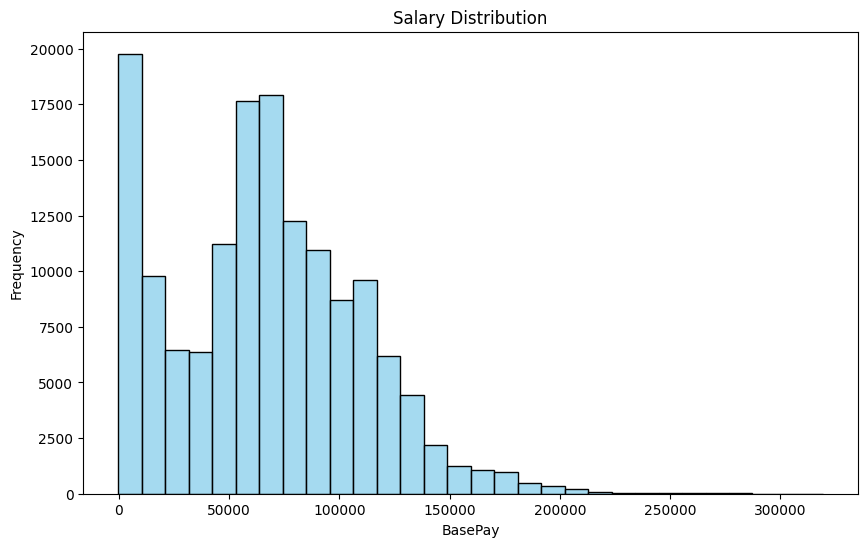

In [30]:

# Histogram for Salary Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['BasePay'], bins=30, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('BasePay')
plt.ylabel('Frequency')
plt.show()

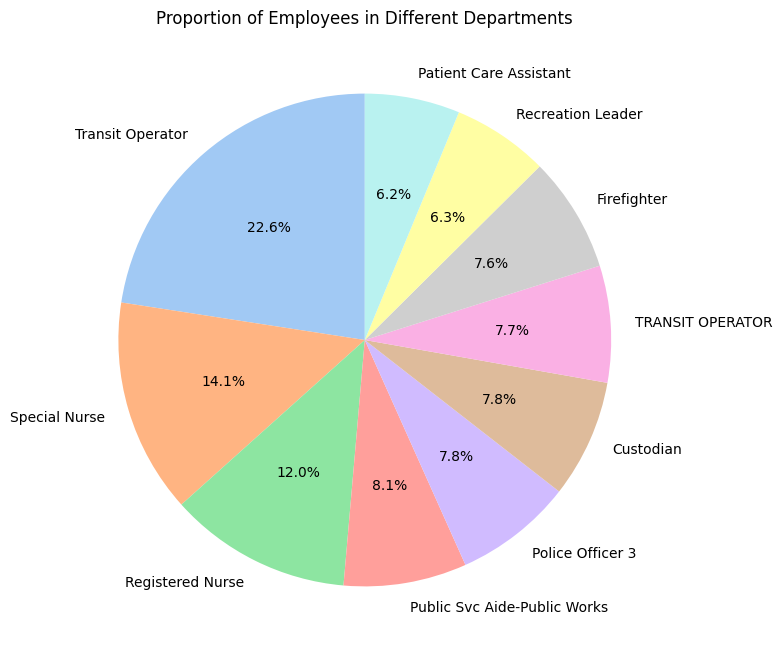

In [33]:
# Pie Chart for Proportion of Employees in Different Departments
plt.figure(figsize=(10, 8))
department_counts = df['JobTitle'].value_counts().head(10)  # Top 10 departments for illustration
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Proportion of Employees in Different Departments')
plt.show()

**Grouped Analysis**

In [36]:
# Group by 'JobTitle' and calculate mean salary for each group
average_salary_by_job_title = df.groupby('JobTitle')['BasePay'].mean()

# Display the result
print(average_salary_by_job_title)

JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2159, dtype: float64


**Simple Correlation Analysis**

In [37]:
# Identify correlation between 'BasePay' and another numerical column (e.g., 'OvertimePay')
correlation = df['BasePay'].corr(df['OvertimePay'])

# Print the correlation coefficient
print(f"Correlation between BasePay and OvertimePay: {correlation}")

Correlation between BasePay and OvertimePay: 0.26673984899677444


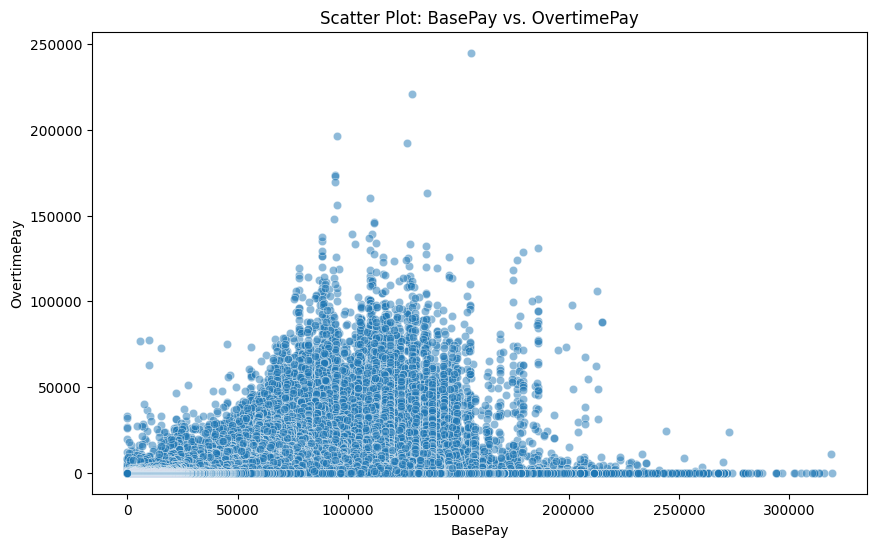

In [38]:

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BasePay', y='OvertimePay', data=df, alpha=0.5)
plt.title('Scatter Plot: BasePay vs. OvertimePay')
plt.xlabel('BasePay')
plt.ylabel('OvertimePay')
plt.show()

**Summary of Insights**

-Dataset Overview:

The dataset contains 148,654 rows and 13 columns.
Each column has a specific data type: integer, object, or float.
The columns include information such as employee ID, employee name, job title, pay details, year, notes, agency, and status.

-Missing Values:

The dataset has missing values in certain columns.
The ‘Benefits’ column has the highest number of missing values (36,163), followed by ‘Notes’ and ‘Status’ columns, which have missing values in all rows.
Other columns have a small number of missing values.

-Descriptive Statistics:

The ‘BasePay’ column has a mean of 66,325.45, a median of 65,007.45, and a mode of 0.0.
The minimum ‘BasePay’ is -166.01, indicating potential errors or negative values.
The maximum ‘BasePay’ is 319,275.01, showing the highest salary recorded.
The range of ‘BasePay’ values is 319,441.02, indicating a wide variation in salaries.
The standard deviation of ‘BasePay’ is 42,764.64, suggesting a significant dispersion of salaries around the mean.

-Job Titles and Salaries:

The ‘JobTitle’ column shows a wide range of job titles.
The average ‘BasePay’ varies across different job titles.
The highest average ‘BasePay’ is observed for the job title “ACPO, JuvP, Juv Prob (SFERS)” with a value of $62,290.78.
Other job titles like “ACCOUNTANT,” “ACUPUNCTURIST,” and “ZOO CURATOR” also have specific average ‘BasePay’ values.

-Correlation Analysis:

There is a positive correlation of approximately 0.27 between ‘BasePay’ and ‘OvertimePay’.
This indicates that as ‘BasePay’ increases, there is a tendency for ‘OvertimePay’ to increase as well, although the correlation is not very strong.

-Salary Distribution Visualization:

The image is a bar graph titled “Salary Distribution”, which visualizes the frequency of different ‘BasePay’ values in the dataset.
The x-axis represents ‘BasePay’, ranging from 0 to 300,000.
The y-axis represents ‘Frequency’, ranging from 0 to 20,000.
There are multiple blue bars, each representing different ranges of ‘BasePay’ and their frequencies.
A significant spike is visible around 0 ‘BasePay’, indicating a large number of entries at this point. This could suggest the presence of part-time, temporary, or unpaid positions.
Another noticeable concentration is between 50,000 and 100,000 ‘BasePay’, where there are more employees earning within this range than any other. This suggests that a substantial portion of employees fall within this salary bracket.
The frequency diminishes as the ‘BasePay’ increases beyond 100,000, with very few employees earning above 250,000. This indicates a wide variation in salaries.

-Proportion of Employees in Different Departments:

The image is a colorful pie chart titled “Proportion of Employees in Different Departments”.
Each slice of the pie represents a different job role, with percentages indicating the proportion of each role.
“Transit Operator” has the largest slice at 22.6%.
“Special Nurse” follows with 14.1%.
“Registered Nurse” holds 12.0%.
Other roles including “Public Svc Aide-Public Works”, “Police Officer 3”, “Custodian”, “Firefighter”, “Recreation Leader”, and “Patient Care Assistant” have smaller proportions ranging from 6.2% to 8.1%.